In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Intro to Modeling

Week 3 | Day 1

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Define the terms: modeling, prediction
- Understand the best line of a set of data
- Find the best fit line by hand

## What is a model?

> the generation of a physical, conceptual, or mathematical representation of a real phenomenon that is difficult to observe directly. Scientific models are used to explain and predict the behaviour of real objects or systems and are used in a variety of scientific disciplines, ranging from physics and chemistry to ecology and the Earth sciences. Although modeling is a central component of modern science, scientific models at best are approximations of the objects and systems that they represent—they are not exact replicas. -- Encyclopedia Britannica

## Key takeaways:

- Models explain and predict (through quantifying relationships)
- Models are approximations (i.e., they are not perfect representations)

# Time/Direction Example

When we drive a constant speed in a single direction, what happens?

**When you drive at a constant speed `s` for `t` hours, the distance you travel is**

<span style="font-size: 20pt;">
$$ 
d = st 
$$
</span>


* The quantities of distance and time are in a **linear relationship**
because the graph is a line with **slope (rate) `s`**.
* This equation is a **model** between the **distance travelled** and the **time travelled**.

## Newton's Second Law of Motion

$$ F = ma $$

- The sum of forces on an object is equal to the mass of the object times the acceleration
- Again we see a linear relationship

## Intro: Linear Relationships

Because we use rates to commonly understand natural processes, linear
relationships are ubiquitous in our lives and our data. We don't always know
how two quantities are related. Linear regression is a way to determine the
relationship from a set of data.

* Models are relationships between quantities
* Linear regression is a method to determine the coefficients of linear
relationships

![](http://www.comfsm.fm/~dleeling/statistics/relationships.gif)

## Prediction

**With a model we can make _predictions.**

35 miles per hour for 2 hours then I predict that you will travel ?? miles.

<br><br>

<div style="font-size: 20pt;">
$$
d=st
$$
</div>

<div style="font-size: 20pt;">
$$
distance = 35 miles * 2 hours
$$
</div>

<div style="font-size: 20pt;">
$$
mph 35 * 2 hours = 70 miles
$$
</div>

## "All models are wrong but some are useful" - George Box

## Predictions Don't Have to Be Accurate to be Useful

In general our models are not so precise if the relationship between our quantities are not perfect, but we can still make a reasonable guess using our models.

* They have to generalize well to be useful
* Real life data comes installed with lots of unexpected variation
* Nothing in life is 100% certain, not even relationships 🙄

## Exercise:

Pair up and consider the situation of the movie theather owner. What are some of the things that it would be useful to model/predict for this person and her business?

### Follow up

For example, if you own a movie theatre, you need need to make sure you have enough
staff on nights and weekends to handle the increased number of patrons. A model
to **predict how many movie-goers will show up on a given night** will help you
predict the amount of employees that you'll need -- enough to handle the customers
but not too many so that you keep labor costs reasonable. Too few employees and
you won't be able to serve all the customers; too many and you've spent too much
on labor. The better the estimate the better your business runs, and even if
the estimate is off a bit you are still more prepared than if you had no
model at all.

Similarly, other models might **predict**:
- **How much** inventory to **stock**
- **How much** a component or raw material will **cost** during **different times of year**
- The **percentage of voters** that will show up in various **weather conditions** 
- and just about anything else

With models we can make predictions.  Good predictions are extremely valuable for a wide variety of purposes

# Linear Regression By Eye

One way we can approximate a slope, is by drawing a line seperating a set of datapoints approximately, then calculating the intercept and slope using a simple equation:

$$ y = mx + b $$

The basic steps:

 - Draw a line that splits the data in half
 - Find the intercept "b"
 - Calculate the slope (the increase in y / increase in x or rise / run)


## Let's consider the points (0,1) and (2,2). 

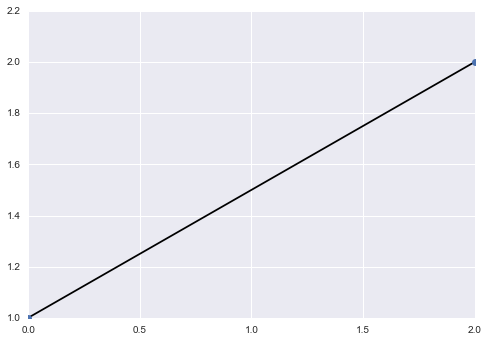

In [2]:
# (x0, x1), (y0, y1)
data = [[0,2], [1, 2]]

plt.plot(data[0], data[1], "k-")
plt.plot(data[0], data[1], "o")

We can find the slope by taking the difference of _x_ points / difference in _y_ points:

$$ \frac{y_0-y_1}{x_0-x_1} $$ 

With our points **[0,1] and [2,2]** respectively, we should have something that looks like this:

$$ \frac{1-2}{0-2} $$

Our slope ends up being:

$$ .5 $$

Completing our equation _(intercept is 1, where the x crosses the y boundary)_:

$$ y = .5x + 1 $$

## Exercise

Using this dataset:
[1, 2.5], [1.5, 3.5], [2, 3.0], [3, 3], [4, 5.2], [5, 4.5], [6, 5.9]

- Find the line of best fit by eye on your desk or the whiteboard
- We'll come together to compare results

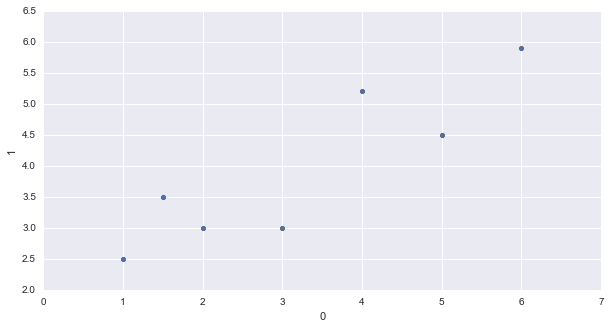

In [3]:
sample_data = [[1,2.5], [1.5,3.5], [2,3.0], [3,3], [4, 5.2], [5, 4.5], [6, 5.9]]
pd.DataFrame(sample_data).plot(kind="scatter", x=0, y=1, figsize=(10, 5))

In [5]:
df = pd.DataFrame(sample_data)

## Simple linear regression

Simple linear regression is an approach for predicting a **continuous response** using a **single feature**. It takes the following form:

$y = \beta_0 + \beta_1x$

- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

$\beta_0$ and $\beta_1$ are called the **model coefficients**:

- We must "learn" the values of these coefficients to create our model.
- And once we've learned these coefficients, we can use the model to predict **something**.


[Wikipedia](https://en.wikipedia.org/wiki/Simple_linear_regression) has a great explanation about how to get the best fit line from the least squares method.  

_In other words, α (the y-intercept) and β (the slope)._

![Best fit coefficients](https://upload.wikimedia.org/math/e/e/d/eed68731d1230938d457c576deee1bcf.png)

Looks messy.  This is the fun part of statistics.  Generally, you don't want to calculate these by hand.  Fortunately, you likely never will.

## Estimating ("learning") model coefficients
- Coefficients are estimated during the model fitting process using the least squares criterion.
- We are find the line (mathematically) which minimizes the sum of squared residuals (or "sum of squared errors").

![](https://snag.gy/9R57Or.jpg)

_Residuals: The difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual._

## Plotting relationships

Seaborn's regplot

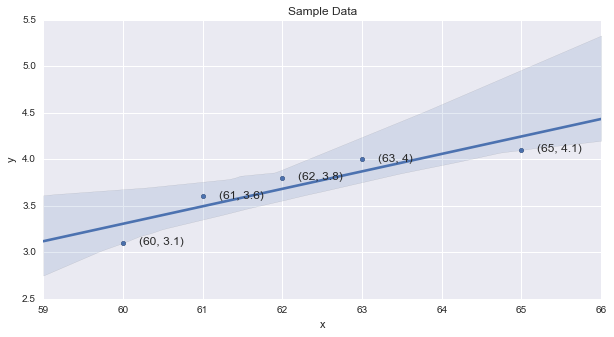

In [11]:
# Our sample data
x = (60, 61, 62, 63, 65)
y = (3.1, 3.6, 3.8, 4, 4.1)

sample_data = zip(x, y)
df = pd.DataFrame(sample_data, columns=["x", "y"])

my_plot = df.plot(kind="scatter", x="x", y="y", title="Sample Data", figsize=(10, 5))

# Add value markers because it's nice to have a visual reference to data points
for point in sample_data:
    my_plot.text(point[0] + .2, point[1] - .02, str(point))

sns.regplot(x="x", y="y", data=df);

## Plotting relationships

Seaborn's pairplot

In [13]:
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


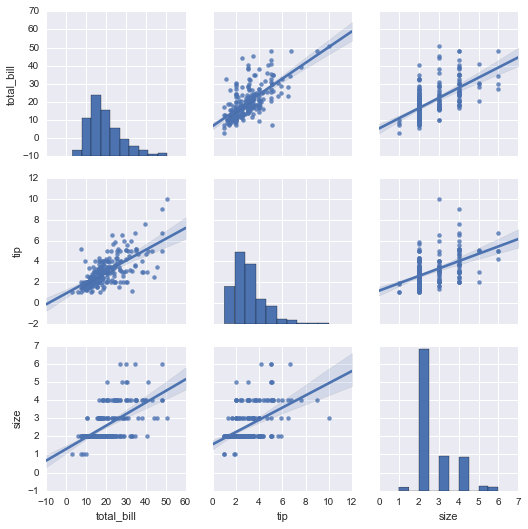

In [14]:
sns.pairplot(tips, kind="reg")

## Exercise

Create a Python function from scratch that minimizes the sum of squared errors using the formula above. The function should accept a list of points and return the best slope and intercept.

Use the following data points:<br>
[[-1, 0], [1, 3],  [2, 4], [3, 7],  [4, 10]]
<br>Check your results by doing the calculations by hand

This is an excellent video on the calculation if you need help:<br>
[Calculation By Hand](https://youtu.be/Qa2APhWjQPc)<br>
The derivation of the calculation begins at around the 17:35 mark.

In [15]:
data_points = [[-1, 0], [1, 3], [2, 4], [3, 7], [4, 10]] 
ddf = pd.DataFrame(data_points)

In [20]:
#makes lists of x and y values
ddf_x = [i[0]for i in data_points]
ddf_y = [i[1]for i in data_points]
print ddf_x
print ddf_y

[-1, 1, 2, 3, 4]
[0, 3, 4, 7, 10]


In [24]:
#find means of x and y values
ddf_x_mean = np.mean(ddf_x)
ddf_y_mean = np.mean(ddf_y)
print ddf_x_mean
print ddf_y_mean

1.8
4.8


In [47]:
ddf_y_ss = (ddf_y_mean - ddf_y)**2 
ddf_y_ss

array([ 23.04,   3.24,   0.64,   4.84,  27.04])

In [65]:
blahblah = sum((ddf_y_mean - [i[1]for i in data_points])**2)
blahblah

58.799999999999997

In [48]:
ddf_y_ss = sum((ddf_y_mean - ddf_y)**2)
ddf_y_ss

58.799999999999997

In [80]:
#x = [list of lists of data points [x,y]]
def ss_y(y_list):
    ldf = pd.DataFrame(y_list)
    y_mean = np.mean([i[1] for i in y_list])
    y_ss = sum((y_mean - [i[1] for i in y_list])**2)
    return y_ss


In [81]:
ss_y(data_points)

58.799999999999997

In [82]:
def ss_x(x_list):
    ldf = pd.DataFrame(x_list)
    y_mean = np.mean([i[0] for i in x_list])
    y_ss = sum((y_mean - [i[0] for i in x_list])**2)
    return y_ss

In [84]:
ss_x(data_points)

14.799999999999997

In [88]:
def sum_y(y_list):
    ldf = pd.DataFrame(y_list)
    y_mean = np.mean([i[1] for i in y_list])
    y_sum = sum((y_mean - [i[1] for i in y_list]))
    return y_sum

In [89]:
sum_y(data_points)

-8.8817841970012523e-16

In [90]:
def sum_x(x_list):
    ldf = pd.DataFrame(x_list)
    x_mean = np.mean([i[0] for i in x_list])
    x_sum = sum((x_mean - [i[0] for i in x_list]))
    return x_sum

In [91]:
sum_x(data_points)

-8.8817841970012523e-16

In [96]:
cov = sum_y(data_points) * sum_x(data_points)
cov

7.8886090522101181e-31

In [100]:
b = cov / ss_x(data_points)
b

5.3301412514933244e-32

In [ ]:
a = ss_y - b*

In [ ]:
def min_sse(my_list):
    
    xy_bar = pd.Series([x*y for x,y in my_list]).mean()
    x_bar = pd.Series([x[0] for x in my_list]).mean()
    y_bar = pd.Series([x[1] for x in my_list]).mean()
    x_sq_bar = pd.Series([x[0]**2 for x in my_list]).mean()
    x_bar_sq = x_bar**2
    
    m = (xy_bar - x_bar * y_bar)/(x_sq_bar - x_bar_sq)
    a = y_bar - m*x_bar
    
    return m, a
    
    
    
m, a = min_sse([[-1, 0], [1, 3], [2, 4], [3, 7], [4, 10]] )